<a href="https://colab.research.google.com/github/kush450629/ME421_GROUP_A1/blob/main/Vibration/ME421_E20021_Vibrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Derivation of Mode Shapes and Linear Operator for Pinned-Free Beam

### 1. Boundary Conditions – Pinned-Free Beam

Consider a uniform beam of length $L$ with the following support conditions:

- **Pinned end (x = 0):**
  - Displacement is fixed: $w(0,t) = 0$
  - Bending moment is zero: $EI \frac{\partial^2 w}{\partial x^2}(0,t) = 0$  ⇒  $w''(0,t) = 0$

- **Free end (x = L):**
  - Bending moment is zero: $w''(L,t) = 0$
  - Shear force is zero: $EI \frac{\partial^3 w}{\partial x^3}(L,t) = 0$  ⇒  $w'''(L,t) = 0$

### 2. Governing Equation and Linear Operator

The equation of motion for free transverse vibration (no axial load) is:

$$
\rho A \frac{\partial^2 w}{\partial t^2} + EI \frac{\partial^4 w}{\partial x^4} = q(x,t)
$$

For free vibration ($q = 0$), we define the spatial differential operator $H$ as:

$$
H = \frac{EI}{\rho A} \frac{\partial^4}{\partial x^4}
$$

This gives the compact form:

$$
\frac{\partial^2 w}{\partial t^2} + H w = 0
$$

### 3. Separation of Variables – Eigenvalue Problem

Assume a time-harmonic solution:

$$
w(x,t) = \phi(x) \, e^{i\omega t}
$$

Substituting yields the eigenvalue problem:

$$
H \phi = \omega^2 \phi \quad \text{or} \quad \frac{d^4 \phi}{dx^4} = \beta^4 \phi
$$

where we introduced the wavenumber parameter:

$$
\beta^4 = \frac{\rho A \omega^2}{EI} \qquad \Rightarrow \qquad \omega = \beta^2 \sqrt{\frac{EI}{\rho A}}
$$

The general solution is:

$$
\phi(x) = A \sin(\beta x) + B \cos(\beta x) + C \sinh(\beta x) + D \cosh(\beta x)
$$

### 4. Applying Pinned Boundary Conditions (x = 0)

1. $\phi(0) = 0$  
   $\implies B + D = 0 \quad \Rightarrow \quad D = -B$

2. $\phi''(0) = 0$  
   $\phi''(x) = \beta^2 \bigl(-A\sin(\beta x) - B\cos(\beta x) + C\sinh(\beta x) + D\cosh(\beta x)\bigr)$  
   $\phi''(0) = \beta^2 (-B + D) = 0 \quad \Rightarrow \quad -B - B = 0 \quad \Rightarrow \quad B = 0$  
   $\Rightarrow D = 0$

Thus the mode shape reduces to:

$$
\phi(x) = A \sin(\beta x) + C \sinh(\beta x)
$$

### 5. Free-end Conditions (x = L) → Frequency Equation

Apply the two conditions at $x = L$:

**a) Zero moment:**

$$
\phi''(L) = \beta^2 \bigl( -A \sin(\beta L) + C \sinh(\beta L) \bigr) = 0
$$

$$
A \sin(\beta L) = C \sinh(\beta L) \quad \Rightarrow \quad C = A \frac{\sin(\beta L)}{\sinh(\beta L)}
$$

**b) Zero shear:**

$$
\phi'''(L) = \beta^3 \bigl( -A \cos(\beta L) + C \cosh(\beta L) \bigr) = 0
$$

Substitute $C$:

$$
-A \cos(\beta L) + A \frac{\sin(\beta L)}{\sinh(\beta L)} \cosh(\beta L) = 0
$$

$$
\cos(\beta L) = \frac{\sin(\beta L) \cosh(\beta L)}{\sinh(\beta L)}
$$

Rearranging gives the well-known **characteristic equation** for the pinned-free beam:

$$
\tan(\beta L) = \tanh(\beta L)
$$

### 6. Mode Shape Expression

The $k$-th eigenfunction (mode shape) can be written as:

$$
\phi_k(x) = \sin(\beta_k x) + \frac{\sin(\beta_k L)}{\sinh(\beta_k L)} \sinh(\beta_k x)
$$

(Amplitude scaling factor is arbitrary and usually normalized later according to mass or other criteria.)

### 7. First Few Roots (approximate values of $\beta_k L$)

- Mode 1: $\beta_1 L \approx 3.9266$
- Mode 2: $\beta_2 L \approx 7.0686$
- Mode 3: $\beta_3 L \approx 10.2102$
- (Higher modes approach $(2k-1)\pi/2$)

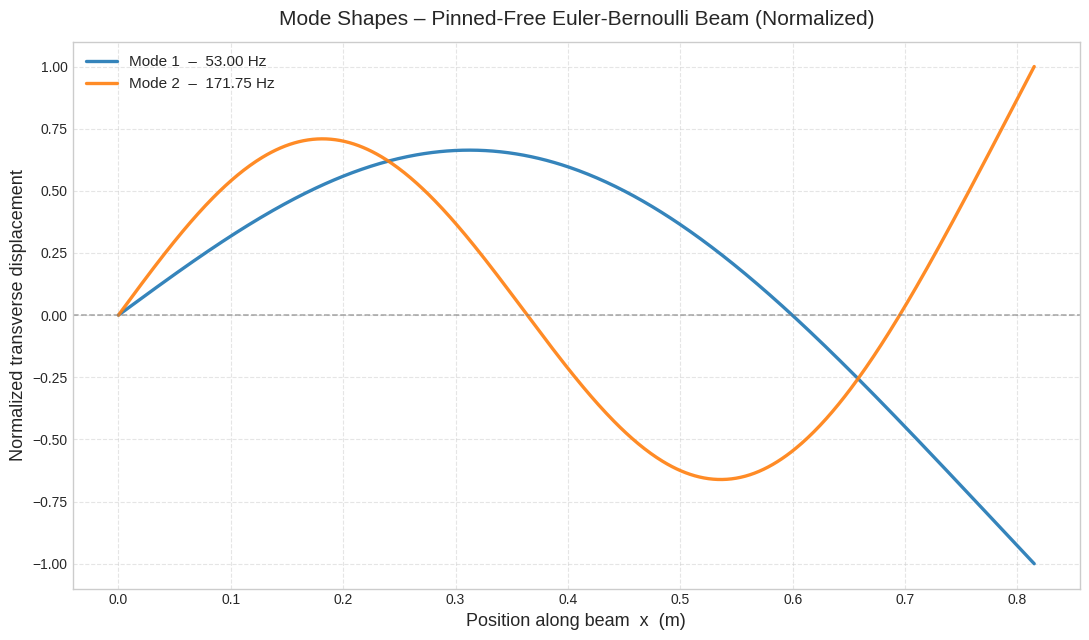


Computed eigenvalues (βₖ L) and natural frequencies:
───────────────────────────────────────────────
Mode  1 :   βL =   3.9266    →    f =  53.00 Hz
Mode  2 :   βL =   7.0686    →    f = 171.75 Hz


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq

# ─── 1. Beam Physical & Geometric Properties ────────────────────────────────
length          = 0.815          # total length [m]
total_mass      = 1.65           # total mass [kg]
young_modulus   = 2.0e11         # E [Pa]
width           = 0.025          # b [m]
thickness       = 0.010          # h [m]

cross_section_area = width * thickness
moment_of_inertia  = (width * thickness**3) / 12
mass_per_unit_length = total_mass / length
flexural_rigidity = young_modulus * moment_of_inertia   # EI

# ─── 2. Characteristic Equation for Pinned-Free Beam ────────────────────────
def pinned_free_freq_eq(lam):
    """ Characteristic function: sin(λ)cosh(λ) − cos(λ)sinh(λ) = 0 """
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# ─── 3. Locate first n eigenvalues (βL values) ──────────────────────────────
def locate_eigenvalues(num_modes=2):
    eigenvalues = []
    # Coarse search grid to find sign-change intervals
    grid = np.linspace(0.5, 15.0, 1200)
    f_vals = pinned_free_freq_eq(grid)

    for i in range(len(grid)-1):
        if f_vals[i] * f_vals[i+1] < 0:           # sign change
            root = brentq(pinned_free_freq_eq, grid[i], grid[i+1])
            eigenvalues.append(root)
            if len(eigenvalues) >= num_modes:
                break

    return np.array(eigenvalues)

lambda_values = locate_eigenvalues(2)

# ─── 4. Mode shape function (arbitrary amplitude) ───────────────────────────
def mode_shape_function(x, lambda_k, L):
    beta = lambda_k / L
    # From moment condition at free end:  σ = sin(βL) / sinh(βL)
    ratio = np.sin(lambda_k) / np.sinh(lambda_k)
    return np.sin(beta * x) + ratio * np.sinh(beta * x)

# ─── 5. Generate plots ──────────────────────────────────────────────────────
x_points = np.linspace(0, length, 600)

plt.figure(figsize=(11, 6.5))
plt.style.use('seaborn-v0_8-whitegrid')   # optional: cleaner look

for mode_idx, lam in enumerate(lambda_values, start=1):
    psi_raw = mode_shape_function(x_points, lam, length)

    # Normalize: peak absolute value = 1
    psi_norm = psi_raw / np.max(np.abs(psi_raw))

    # Natural frequency
    beta = lam / length
    omega_rad = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f_hz = omega_rad / (2 * np.pi)

    plt.plot(x_points, psi_norm,
             label=f'Mode {mode_idx}  –  {f_hz:.2f} Hz',
             linewidth=2.4, alpha=0.9)

# ─── Plot cosmetics ─────────────────────────────────────────────────────────
plt.axhline(y=0, color='gray', lw=1.1, ls='--', alpha=0.7)
plt.title('Mode Shapes – Pinned-Free Euler-Bernoulli Beam (Normalized)',
          fontsize=15, pad=12)
plt.xlabel('Position along beam  x  (m)', fontsize=13)
plt.ylabel('Normalized transverse displacement', fontsize=13)
plt.legend(fontsize=11, loc='upper left', framealpha=0.95)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ─── Summary output ─────────────────────────────────────────────────────────
print("\nComputed eigenvalues (βₖ L) and natural frequencies:")
print("───────────────────────────────────────────────")
for k, lam in enumerate(lambda_values, 1):
    beta = lam / length
    omega = beta**2 * np.sqrt(flexural_rigidity / mass_per_unit_length)
    f = omega / (2 * np.pi)
    print(f"Mode {k:2d} :   βL = {lam:8.4f}    →    f = {f:6.2f} Hz")

# 2-DOF Modal Reduction of Pinned-Free Beam with Discrete Attachments


### 1. System Description & Key Parameters

We model a pinned-free Euler-Bernoulli beam (length $L = 0.815$ m) carrying three discrete elements:

**Beam properties**
- Length: $L = 0.815$ m  
- Total mass: $m_\text{beam} = 1.65$ kg  
- Cross-section: $b = 0.025$ m, $h = 0.010$ m  
- Young's modulus: $E = 200$ GPa  
- Second moment of area: $I = bh^3/12$  
- Flexural rigidity: $EI \approx 416.67$ N·m²  
- Mass per unit length: $\rho A = m_\text{beam}/L \approx 2.025$ kg/m

**Discrete attachments (lumped masses & stiffness)**
- Helical spring: stiffness $k_s = 3800$ N/m, attached at $x_s = 0.75$ m  
- Effective spring mass (1/3 of spring + connector): $m_{s,\text{eff}} = 0.1383$ kg  
- Electromagnetic exciter mass: $m_e = 4.2$ kg at $x_e = 0.40$ m  
- Damper + added mass: $m_d = 0.53$ kg at $x_d = 0.20$ m

### 2. Assumed Modal Expansion (Galerkin Approach)

We approximate the transverse displacement field using the **first two undamped mode shapes** of the bare pinned-free beam:

$$
y(x,t) \approx \psi_1(x)\, z_1(t) + \psi_2(x)\, z_2(t)
$$

where $\psi_k(x)$ are the normalized (or arbitrarily scaled) eigenfunctions satisfying the pinned-free boundary conditions and the characteristic equation $\tan(\beta_k L) = \tanh(\beta_k L)$.

### 3. Generalized (Modal) Mass Matrix

The $k$-th diagonal element of the modal mass matrix is obtained from the total kinetic energy:

$$
M_k = \underbrace{\int_0^L \rho A \, \psi_k^2(x) \, dx}_{\text{beam distributed}}
+ m_{s,\text{eff}} \, \psi_k^2(x_s)
+ m_e \, \psi_k^2(x_e)
+ m_d \, \psi_k^2(x_d)
$$

Because the bare-beam modes are orthogonal with respect to the distributed mass, the off-diagonal terms vanish and we obtain a **diagonal mass matrix**:

$$
\mathbf{M} = \operatorname{diag}(M_1, M_2)
$$

### 4. Generalized (Modal) Stiffness Matrix

The modal stiffness $K_k$ combines the beam's bending strain energy and the potential energy stored in the helical spring:

$$
K_k = \underbrace{\int_0^L EI \left( \frac{d^2 \psi_k}{dx^2} \right)^2 dx}_{\text{beam bending stiffness}}
+ k_s \, \psi_k^2(x_s)
$$

Using the free-vibration eigenvalue relation $EI \psi_k'''' = \rho A \omega_{k,\text{bare}}^2 \psi_k$ and integration by parts (with pinned-free BCs), the beam contribution simplifies to:

$$
\int_0^L EI (\psi_k'')^2 dx = \omega_{k,\text{bare}}^2 \int_0^L \rho A \psi_k^2 dx = \omega_{k,\text{bare}}^2 M_{k,\text{beam}}
$$

Thus the total modal stiffness becomes:

$$
K_k = \omega_{k,\text{bare}}^2 M_{k,\text{beam}} + k_s \psi_k^2(x_s)
$$

Again, the modal stiffness matrix is diagonal:

$$
\mathbf{K} = \operatorname{diag}(K_1, K_2)
$$

### 5. Decoupled Equations of Motion in Modal Coordinates

Applying the principle of virtual work (or Lagrange’s equations), the reduced-order model in modal space reads:

$$
\mathbf{M} \ddot{\mathbf{z}} + \mathbf{K} \mathbf{z} = \mathbf{Q}(t)
$$

with generalized force vector coming from the applied excitation force $F(t)$ at $x = x_e$:

$$
\mathbf{Q}(t) = F(t) \begin{Bmatrix} \psi_1(x_e) \\ \psi_2(x_e) \end{Bmatrix}
$$

Explicitly:

$$
\begin{aligned}
M_1 \ddot{z}_1 + K_1 z_1 &= F(t) \psi_1(x_e) \\
M_2 \ddot{z}_2 + K_2 z_2 &= F(t) \psi_2(x_e)
\end{aligned}
$$

### 6. Estimated Natural Frequencies of the Loaded System

The natural frequencies of the modified (loaded) system in each mode are approximated as:

$$
\omega_{n,k} = \sqrt{\frac{K_k}{M_k}}, \qquad f_{n,k} = \frac{\omega_{n,k}}{2\pi}
$$

These values will be higher than the bare-beam frequencies due to the added spring stiffness, but lower than a fully clamped system because of the large lumped masses.

---

**Next steps in notebook:**
- Compute numerical values of $\psi_1(x_e)$, $\psi_1(x_s)$, etc. using previously derived mode shapes
- Evaluate $M_1$, $M_2$, $K_1$, $K_2$
- Compare $f_{n,1}$ and $f_{n,2}$ with experimental / FE results
- Simulate time response to harmonic forcing

In [2]:
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import quad

# ─── Beam & Material Properties ─────────────────────────────────────────────
beam_length     = 0.815               # L [m]
beam_total_mass = 1.65                # kg
linear_density  = beam_total_mass / beam_length   # ρA [kg/m]

youngs_modulus  = 2.0e11              # E [Pa]
width           = 0.025               # b [m]
height          = 0.010               # h [m]
area_moment     = (width * height**3) / 12       # I [m⁴]
flex_rigidity   = youngs_modulus * area_moment   # EI [N·m²]

# ─── Lumped Elements ────────────────────────────────────────────────────────
spring_stiffness    = 3800.0          # k_s [N/m]
spring_location     = 0.75            # x_s [m]
spring_eff_mass     = 0.1383          # m_s,eff [kg]

exciter_mass        = 4.2             # m_e [kg]
exciter_location    = 0.40            # x_e [m]

damper_mass         = 0.53            # m_d [kg]
damper_location     = 0.20            # x_d [m]

# ─── Characteristic Equation (Pinned-Free) ──────────────────────────────────
def char_eq_non_dim(lam):
    """ sin(λ)cosh(λ) - cos(λ)sinh(λ) = 0 """
    return np.sin(lam) * np.cosh(lam) - np.cos(lam) * np.sinh(lam)

# Find first two positive roots
scan_points = np.linspace(0.01, 13.0, 1400)
sign_changes = np.where(np.diff(np.sign(char_eq_non_dim(scan_points))) != 0)[0]

lambda_roots = []
for idx in sign_changes[:2]:  # take first two sign changes
    a, b = scan_points[idx], scan_points[idx+1]
    root = brentq(char_eq_non_dim, a, b)
    lambda_roots.append(root)

print(f"Found βL roots: {[f'{r:.4f}' for r in lambda_roots]}\n")

# ─── Mode Shape & Second Derivative ─────────────────────────────────────────
def mode_shape(x, lam, L):
    beta = lam / L
    coeff = np.sin(lam) / np.sinh(lam) if np.abs(np.sinh(lam)) > 1e-12 else 0.0
    return np.sin(beta * x) + coeff * np.sinh(beta * x)

def mode_shape_d2(x, lam, L):
    beta = lam / L
    coeff = np.sin(lam) / np.sinh(lam) if np.abs(np.sinh(lam)) > 1e-12 else 0.0
    return beta**2 * (-np.sin(beta * x) + coeff * np.sinh(beta * x))

# ─── Compute Modal Mass & Stiffness for each mode ───────────────────────────
modal_masses   = []
modal_stiff    = []

for lam_k in lambda_roots:
    # Beam distributed mass contribution
    beam_mass_int = quad(lambda x: linear_density * mode_shape(x, lam_k, beam_length)**2,
                         0, beam_length, limit=100)[0]

    # Lumped mass contributions
    point_masses = (
        spring_eff_mass * mode_shape(spring_location, lam_k, beam_length)**2 +
        exciter_mass    * mode_shape(exciter_location, lam_k, beam_length)**2 +
        damper_mass     * mode_shape(damper_location, lam_k, beam_length)**2
    )

    M_k = beam_mass_int + point_masses
    modal_masses.append(M_k)

    # Beam strain energy (bending)
    beam_stiff_int = quad(lambda x: flex_rigidity * mode_shape_d2(x, lam_k, beam_length)**2,
                          0, beam_length, limit=100)[0]

    # Spring potential energy
    spring_contrib = spring_stiffness * mode_shape(spring_location, lam_k, beam_length)**2

    K_k = beam_stiff_int + spring_contrib
    modal_stiff.append(K_k)

# Form diagonal matrices
M_modal = np.diag(modal_masses)
K_modal = np.diag(modal_stiff)

# Natural frequencies of the loaded system
omega_n = np.sqrt(np.diag(K_modal) / np.diag(M_modal))
f_n_hz  = omega_n / (2 * np.pi)

# ─── Display Results ────────────────────────────────────────────────────────
print("Modal Mass Matrix [kg]:")
print(np.round(M_modal, decimals=4))

print("\nModal Stiffness Matrix [N/m]:")
print(np.round(K_modal, decimals=1))

print("\nNatural Frequencies of Loaded Beam:")
for mode_num, freq in enumerate(f_n_hz, start=1):
    print(f"   Mode {mode_num:2d} →  {freq:6.2f} Hz")

Found βL roots: ['3.9266', '7.0686']

Modal Mass Matrix [kg]:
[[4.2735 0.    ]
 [0.     1.7822]]

Modal Stiffness Matrix [N/m]:
[[ 94998.5      0. ]
 [     0.  962230.7]]

Natural Frequencies of Loaded Beam:
   Mode  1 →   23.73 Hz
   Mode  2 →  116.94 Hz


## Rigid-Body Approximation for the Dominant Low-Frequency Mode (1-DOF Model)

### 1. Why the Flexural Modes May Not Capture the True First Mode

The classical Euler-Bernoulli modal analysis gives elastic bending modes. However, in this experimental setup — with a heavy exciter mass, a relatively soft spring near the free end, and a pinned support — the **lowest-frequency mode** tends to behave more like a **rigid-body rotation** about the pinned end rather than significant beam bending.  

To better approximate this pendulum-like “rocking” or “swinging” motion, we treat the beam as a rigid bar pivoting at x = 0.

### 2. Equivalent 1-DOF Rotational Model

We introduce a single generalized coordinate: the small angular rotation θ(t) of the entire beam (rigid-body assumption).

**Total moment of inertia about the pivot (x = 0):**

$$
J_0 = \frac{1}{3} m_\text{beam} L^2 + m_{s,\text{eff}} \, l_s^2 + m_e \, l_e^2 + m_d \, l_d^2
$$

- The $\frac{1}{3} m L^2$ term is the rotational inertia of a uniform rod about one end.  
- All lumped masses contribute $m \, r^2$ terms according to their distance from the pin.

**Restoring (rotational) stiffness from the spring:**

For small angles, the vertical displacement at the spring location is approximately $l_s \theta$.  
The spring force is $k_s (l_s \theta)$, and the resulting torque about the pivot is $k_s l_s \theta \cdot l_s$.

Thus:

$$
K_\theta = k_s \, l_s^2
$$

### 3. Equation of Motion

Applying the angular form of Newton’s second law about the pinned support:

$$
J_0 \, \ddot{\theta} + K_\theta \, \theta = \tau_\text{ext}(t)
$$

where the external torque comes from the excitation force $F(t)$ applied at distance $l_e$:

$$
\tau_\text{ext}(t) = F(t) \, l_e
$$

Substituting the expressions:

$$
\left( \frac{1}{3} m_\text{beam} L^2 + m_{s,\text{eff}} l_s^2 + m_e l_e^2 + m_d l_d^2 \right) \ddot{\theta}
+ k_s l_s^2 \, \theta = F(t) \, l_e
$$

### 4. Estimated Natural Frequency (Rigid-Body Approximation)

The undamped natural frequency of this equivalent 1-DOF torsional oscillator is:

$$
\omega_{n,\text{rigid}} = \sqrt{\frac{K_\theta}{J_0}} = \sqrt{\frac{k_s l_s^2}{J_0}} \quad \text{(rad/s)}
$$

$$
f_{n,\text{rigid}} = \frac{1}{2\pi} \sqrt{\frac{k_s l_s^2}{J_0}} \quad \text{(Hz)}
$$

This 1-DOF approximation provides a more accurate estimate of the lower-frequency "swinging" mode that the pure flexural model may miss or over-stiffen.



/tmp/ipython-input-78828889.py:80: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


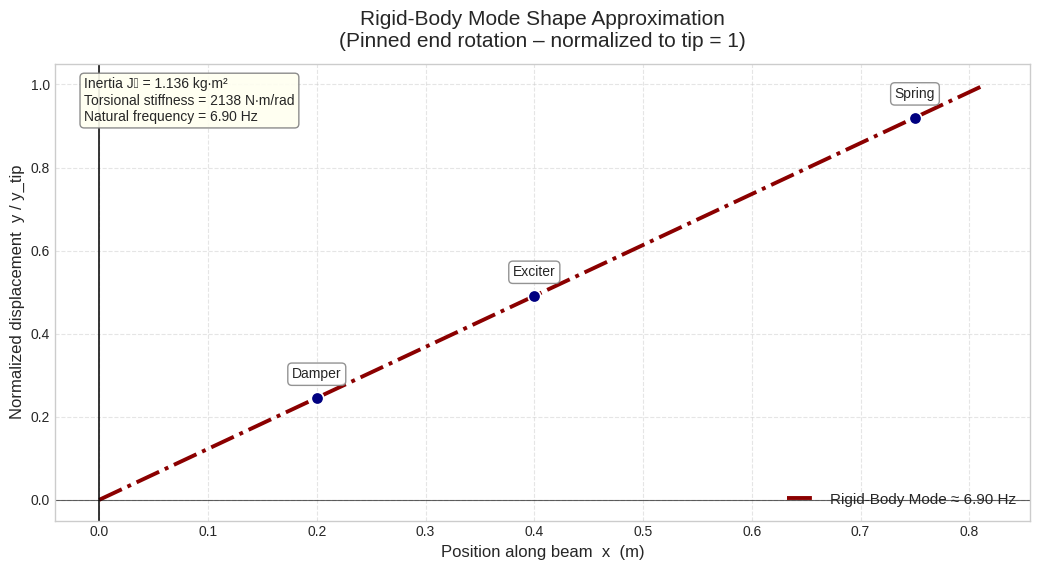

Rigid-Body 1-DOF Approximation Results
──────────────────────────────────────
  Pivot inertia (J₀)       :   1.1363 kg·m²
  Torsional stiffness      :   2137.5 N·m/rad
  Natural frequency        :     6.90 Hz


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ─── Physical & Geometric Parameters ────────────────────────────────────────
beam_length         = 0.815          # L [m]
beam_mass           = 1.65           # total beam mass [kg]
spring_stiff        = 3800.0         # k_s [N/m]
spring_pos          = 0.75           # x_s [m]

# Lumped masses & locations
m_spring_eff        = 0.1383         # effective spring mass [kg]
m_exciter           = 4.2            # exciter mass [kg]
m_damper            = 0.53           # damper mass [kg]

x_exciter           = 0.40           # exciter location [m]
x_damper            = 0.20           # damper location [m]

# ─── Rigid-Body Model Calculations ──────────────────────────────────────────
# Moment of inertia about pinned end (x=0)
# Uniform rod: (1/3) m L² + Σ m_i r_i²
inertia_pivot = (
    (1.0 / 3.0) * beam_mass * beam_length**2 +
    m_spring_eff * spring_pos**2 +
    m_exciter    * x_exciter**2 +
    m_damper     * x_damper**2
)

# Torsional stiffness from spring (small-angle: torque = k_s * (l_s θ) * l_s)
torsional_stiffness = spring_stiff * spring_pos**2

# Undamped natural frequency
omega_n_rad = np.sqrt(torsional_stiffness / inertia_pivot)
f_n_hz      = omega_n_rad / (2.0 * np.pi)

# ─── Rigid-Body Mode Shape (linear displacement) ────────────────────────────
x = np.linspace(0, beam_length, 200)

# For pure rigid rotation about x=0, displacement y(x) = θ · x
# Normalized so tip displacement = 1 → y_norm(x) = x / L
y_norm = x / beam_length

# ─── Plotting ───────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10.5, 5.8))

ax.plot(x, y_norm,
        color='darkred', lw=2.8, ls='-.',
        label=f'Rigid-Body Mode ≈ {f_n_hz:.2f} Hz')

# Mark attachment points with small circles + labels
attachments = [
    (x_damper,  x_damper/beam_length,  'Damper',   (0, 12)),
    (x_exciter, x_exciter/beam_length, 'Exciter',  (0, 12)),
    (spring_pos, spring_pos/beam_length, 'Spring', (0, 12))
]

for pos, yval, label, offset in attachments:
    ax.scatter(pos, yval, s=80, color='navy', zorder=10, edgecolor='white', linewidth=1.2)
    ax.annotate(label, xy=(pos, yval), xytext=offset,
                textcoords='offset points', ha='center', va='bottom',
                fontsize=10, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.85, ec='gray'))

# Cosmetics
ax.axhline(0, color='k', lw=0.8, alpha=0.6)
ax.axvline(0, color='k', lw=1.1)
ax.set_title('Rigid-Body Mode Shape Approximation\n(Pinned end rotation – normalized to tip = 1)',
             fontsize=15, pad=12)
ax.set_xlabel('Position along beam  x  (m)', fontsize=12)
ax.set_ylabel('Normalized displacement  y / y_tip', fontsize=12)
ax.grid(True, ls='--', alpha=0.5, which='both')

# Small text box with calculated values
props = dict(boxstyle='round', facecolor='ivory', alpha=0.9, edgecolor='gray')
info_text = f'Inertia J₀ = {inertia_pivot:.3f} kg·m²\n' \
            f'Torsional stiffness = {torsional_stiffness:.0f} N·m/rad\n' \
            f'Natural frequency = {f_n_hz:.2f} Hz'
ax.text(0.03, 0.97, info_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
plt.tight_layout()
plt.show()

# ─── Console Output ─────────────────────────────────────────────────────────
print("Rigid-Body 1-DOF Approximation Results")
print("──────────────────────────────────────")
print(f"  Pivot inertia (J₀)       : {inertia_pivot:8.4f} kg·m²")
print(f"  Torsional stiffness      : {torsional_stiffness:8.1f} N·m/rad")
print(f"  Natural frequency        : {f_n_hz:8.2f} Hz")